## 01 - Naive Bayesian - Gaussian - Lab

===Task===

- Generate a 2 class data using sklearn.
- Put Gaussian Naive Bayesian Classification into class
- Fit the model on the data then calculate accuracy accordingly.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Generate a 2 class data using sklearn

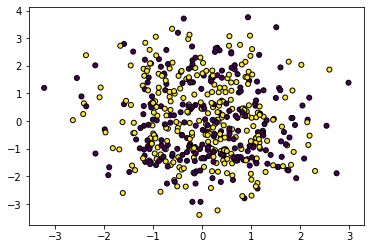

In [4]:
X, y = make_classification(n_samples=500, n_features=10, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# look at the data...it is likely not linearly separable!

In [5]:
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test:  ",X_test.shape)
print("y_test:  ",y_test.shape)

X_train:  (350, 10)
y_train:  (350,)
X_test:   (150, 10)
y_test:   (150,)


# 2) Put Gaussian Naive Bayesian Classification into class

In [73]:
class GaussianNaive_Binary():
   
    #Calculate the mean and std for each feature for each class
    def fit(self, X_train, y_train):
        n = X_train.shape[1]
        self.classes = np.unique(y_train)    #<-----represent array of class
        self.k = len(self.classes)           #<-----number of class
        mean = np.zeros((self.k,n))
        std = np.zeros((self.k,n))
        
        for label in self.classes:
            mean[label, :] = X_train[y_train == label].mean(axis=0)  #<-- axis along which are computed
            std[label, :] = X_train[y_train == label].std(axis=0)
            
            #
            assert mean.shape == (self.k, X_train.shape[1])   #<---check a condition is true
            assert std.shape == (self.k, X_train.shape[1])    #<---check a condition is true
            self.mean = mean
            self.std = std
            
        #Calculate the prior p(y)    
        m = {}
        sum_m = 0
        for label in self.classes:
            m[label] = len(X_train[y_train==label])
            sum_m = sum_m + m[label]
                       
        self.prior = {}
        sum_prior = 0   
        for label in self.classes:
            self.prior[label] = m[label] / sum_m
            sum_prior = sum_prior + self.prior[label]
        assert sum_prior == 1           #"sum of probability not equal to 1"
            
    
    #Define the probability density function so we can later calculate p(x|y)
    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
    
    def predict(self, X_test):        
        posteriors = np.zeros((X_test.shape[0], self.k))
        
        for idx in range(self.k):
            label = self.classes[idx]
            
            #Calculate the likelihood p(x|y)
            likelihood = self.gaussian_pdf(X_test, self.mean[idx, :], self.std[idx, :])
            assert likelihood.shape == (X_test.shape[0], X_test.shape[1])
                              
            #Calculate thetotal likelihood                  
            total_likelihood = np.prod(likelihood, axis=1)

            #Calculate the posterior p(x|y)p(y)for each class
            posteriors[:, idx] = self.prior[label] * total_likelihood
                              
            #we use argmax to find prob from posteriors p(y|x)
            yhat = np.argmax(posteriors, axis=1)        #<---- along axis1 (row)
        return yhat


## 3) Fit the model and Calculate accuracy accordingly.

In [71]:
model = GaussianNaive_Binary()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [72]:
from sklearn.metrics import average_precision_score, classification_report
print("====Average precision score====")
print(average_precision_score(y_test, yhat))
print("\n")
print("====Classification report=====")
print("Report: ", classification_report(y_test, yhat))

====Average precision score====
0.7572183470725006


====Classification report=====
Report:                precision    recall  f1-score   support

           0       0.85      0.77      0.81        74
           1       0.80      0.87      0.83        76

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150

